In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite

In [32]:
def is_unit(a,R):
    for b in R: 
        if a*b ==1:
            return True
    return False    
    

def is_power(a, R, k =1 ):
    if not is_unit(a,R):
        return 0
    return 1


def unitary_cayley(R):
    unit = []
    n = len(R)
    for i in R:
        if is_unit(i,R):
            unit.append(i)
    g=nx.empty_graph(n)
    elements = [a for a in R]
    for i in range(n):
        for j in range(n):
            if (elements[i]-elements[j]) in unit:
                g.add_edge(i,j)
    return g  


def unitary_cayley_abstract(R):
    unit = []
    n = len(R)
    for i in R:
        if is_unit(i,R):
            unit.append(i)
    g=nx.empty_graph(n)
    for i in R:
        for j in R:
            if (i-j) in unit:
                g.add_edge(i,j)
    return g  

def n_cycle(n=5):
    g=nx.empty_graph(n)
    for i in range(n-1):
        g.add_edge(i,i+1)
    g.add_edge(n-1,0)
    return g

def circulant_distance(i,j,n):
    return min(abs(i-j), n-abs(i-j))

def test_induced_cycle(g,cycle):
    """
    given a graph g and a cycle in g, test whether this cycle is induced
    """
    n = len(cycle)
    for i in range(n):
        for j in range(n):
            if circulant_distance(i,j,n)>1 and cycle[j] in g.neighbors(cycle[i]):
                return False
    return True    

def test_perfect(g):
    cycles = nx.cycle_basis(g)
    result = []
    for c in cycles:
        if len(c) % 2 ==1 and len(c)>4:
            result.append(c)
            break
    if len(result) ==0:
        return True
    cycle = result[0]
    return not test_induced_cycle(g,cycle)
    

def induced_graph(g,v):
    n = len(v)
    induced_g=nx.empty_graph(n)
    for i in range(n):
        for j in range(n):
            if v[j] in g.neighbors(v[i]):
                induced_g.add_edge(i,j)
    return induced_g  
    
    
    
    

# The unitary Cayley graph on $R = M_2(\mathbb{F}_2)$

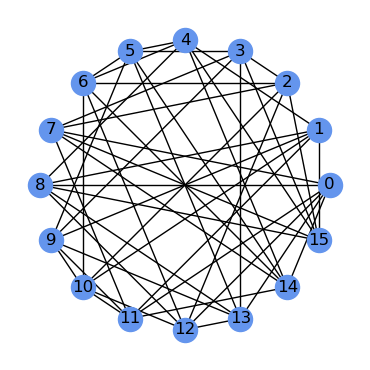

In [53]:
fig = plt.gcf()
fig.set_size_inches(3.5,3.5)
F = GF(2)
R = MatrixSpace(F,2,2)
g = unitary_cayley(R)
pos = nx.circular_layout(g)
nx.draw(g, pos = pos,
       with_labels = True,
       #node_size = 600,
       #scale = 1,
        label = False,
       node_color = '#6495ED')
plt.savefig("unitary_matrix_over_F2.png", dpi =200)

In [54]:
A = nx.adjacency_matrix(g).todense()
A

array([[0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1],
       [0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1],
       [0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0],
       [0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0],
       [1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1],
       [1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1],
       [0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0],
       [0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0],
       [1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0],
       [1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0],
       [1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0]])

In [55]:
adj_matrix = A
matrix_size = g.number_of_nodes()
matrix = adj_matrix
f = MatrixSpace(IntegerRing(),matrix_size)(matrix).charpoly()
print(f.factor())

(x - 6) * (x - 2)^6 * (x + 2)^9


In [42]:
cycles = nx.cycle_basis(g)
for c in cycles:
    if len(c) % 2 ==1 and len(c)>4:
        print(c)

In [44]:
cycles = nx.cycle_basis(nx.complement(g))
for c in cycles:
    if len(c) % 2 ==1 and len(c)>4:
        print(c)

# Find a 5-cycle for $R = M_2(\mathbb{F}_3)$

In [45]:
F = GF(3)
R = MatrixSpace(F,2,2)
g = unitary_cayley(R)
cycles = nx.cycle_basis(g)
result = []
for c in cycles:
    if len(c) % 2 ==1 and len(c)>4:
        result.append(c)
        break 
cycle = result[0]
cycle
matrices = [R[item] for item in cycle]
matrices

[
[0 1]  [1 2]  [2 1]  [1 2]  [2 2]
[0 2], [1 2], [2 2], [2 1], [2 2]
]

# Find a 5-cycle for $R = M_2(\mathbb{F}_5)$

In [146]:
F = GF(5)
R = MatrixSpace(F,2,2)
g = unitary_cayley(R)
cycles = nx.cycle_basis(g)
result = []
for c in cycles:
    if len(c) % 2 ==1 and len(c)>4:
        result.append(c)
        break 
cycle = result[0]
cycle
matrices = [R[item] for item in cycle]
matrices

[
[2 1]  [3 3]  [4 3]  [3 4]  [0 0]
[1 0], [4 4], [4 3], [4 4], [0 0]
]

# Find a 5-cycle for $R = M_2(\mathbb{F}_4)$

In [193]:
F = GF(4)
R = MatrixSpace(F,2,2)
g = unitary_cayley(R)
cycles = nx.cycle_basis(g)
result = []
for c in cycles:
    if len(c) ==5 and 0 in c:
        result.append(c)
        matrices = [R[item] for item in c]
        print(matrices) 
        break


[[    z2     z2]
[z2 + 1      0], [z2 + 1 z2 + 1]
[     1      1], [     1 z2 + 1]
[     1 z2 + 1], [z2 + 1      1]
[     1      1], [0 0]
[0 0]]


# Find a 5-cycle for $R = M_3(\mathbb{F}_2)$

In [13]:
F = GF(2)
R = MatrixSpace(F,3,3)
g = unitary_cayley(R)
cycles = nx.cycle_basis(g)
result = []
for c in cycles:
    if len(c) ==5 and 0 in c:
        result.append(c)
        matrices = [R[item] for item in c]
        #print(matrices) 
        break
for item in matrices:
    print(item)
    print('---')
        

[1 0 0]
[0 1 0]
[1 0 1]
---
[0 1 0]
[1 0 1]
[1 1 1]
---
[1 1 1]
[1 1 1]
[1 1 0]
---
[0 1 1]
[1 0 1]
[1 1 1]
---
[0 0 0]
[0 0 0]
[0 0 0]
---


In [39]:
F = GF(2)
R = MatrixSpace(F,3,3)
g = unitary_cayley(R)
cycles = nx.cycle_basis(g)
result = []
for c in cycles:
    if len(c) ==5 and 0 in c:
        result.append(c)
        matrices = [R[item] for item in c]
        for m in matrices:
            print(m)
            print('---')
        break

[1 0 0]
[0 1 0]
[1 0 1]
---
[0 1 0]
[1 0 1]
[1 1 1]
---
[1 1 1]
[1 1 1]
[1 1 0]
---
[0 1 1]
[1 0 1]
[1 1 1]
---
[0 0 0]
[0 0 0]
[0 0 0]
---


In [41]:
F = GF(2)
R = MatrixSpace(F,3,3)
g = unitary_cayley(R)
cycles = nx.cycle_basis(g)
result = []
for c in cycles:
    if len(c) ==5 and 0 in c:
        result.append(c)
        matrices = [R[item] for item in c]
        for m in matrices:
            print(m)
            print('---')
        

[1 0 0]
[0 1 0]
[1 0 1]
---
[0 1 0]
[1 0 1]
[1 1 1]
---
[1 1 1]
[1 1 1]
[1 1 0]
---
[0 1 1]
[1 0 1]
[1 1 1]
---
[0 0 0]
[0 0 0]
[0 0 0]
---
[1 0 0]
[0 1 0]
[0 1 1]
---
[0 1 0]
[1 0 1]
[1 1 1]
---
[1 1 1]
[1 1 1]
[1 1 0]
---
[0 1 1]
[1 0 1]
[1 1 1]
---
[0 0 0]
[0 0 0]
[0 0 0]
---
[0 1 1]
[0 0 1]
[1 0 0]
---
[0 1 0]
[1 0 1]
[1 1 1]
---
[1 1 1]
[1 1 1]
[1 1 0]
---
[0 1 1]
[1 0 1]
[1 1 1]
---
[0 0 0]
[0 0 0]
[0 0 0]
---
[0 0 1]
[0 1 0]
[1 0 1]
---
[0 1 0]
[1 0 1]
[1 1 1]
---
[1 1 1]
[1 1 1]
[1 1 0]
---
[0 1 1]
[1 0 1]
[1 1 1]
---
[0 0 0]
[0 0 0]
[0 0 0]
---
[1 1 1]
[0 1 0]
[1 0 0]
---
[0 1 0]
[1 0 1]
[1 1 1]
---
[1 1 1]
[1 1 1]
[1 1 0]
---
[0 1 1]
[1 0 1]
[1 1 1]
---
[0 0 0]
[0 0 0]
[0 0 0]
---
[1 1 1]
[0 0 1]
[1 0 0]
---
[0 1 0]
[1 0 1]
[1 1 1]
---
[1 1 1]
[1 1 1]
[1 1 0]
---
[0 1 1]
[1 0 1]
[1 1 1]
---
[0 0 0]
[0 0 0]
[0 0 0]
---
[1 1 0]
[0 1 1]
[0 1 0]
---
[0 1 0]
[1 0 1]
[1 1 1]
---
[1 1 1]
[1 1 1]
[1 1 0]
---
[0 1 1]
[1 0 1]
[1 1 1]
---
[0 0 0]
[0 0 0]
[0 0 0]
---
[1 0 1]
[0 1 1]
[1 0


[1 1 1]
[1 0 1]
[0 1 1]
---
[1 0 0]
[0 1 1]
[1 1 1]
---
[1 1 1]
[1 1 1]
[1 1 0]
---
[0 1 1]
[1 0 1]
[1 1 1]
---
[0 0 0]
[0 0 0]
[0 0 0]
---
[0 1 1]
[1 1 1]
[1 1 0]
---
[1 0 0]
[0 1 1]
[1 1 1]
---
[1 1 1]
[1 1 1]
[1 1 0]
---
[0 1 1]
[1 0 1]
[1 1 1]
---
[0 0 0]
[0 0 0]
[0 0 0]
---
[0 1 1]
[1 1 1]
[1 0 1]
---
[1 0 0]
[0 1 1]
[1 1 1]
---
[1 1 1]
[1 1 1]
[1 1 0]
---
[0 1 1]
[1 0 1]
[1 1 1]
---
[0 0 0]
[0 0 0]
[0 0 0]
---
[1 0 0]
[0 0 1]
[0 1 1]
---
[1 0 1]
[0 1 0]
[1 1 1]
---
[1 1 1]
[1 1 1]
[1 1 0]
---
[0 1 1]
[1 0 1]
[1 1 1]
---
[0 0 0]
[0 0 0]
[0 0 0]
---
[0 1 0]
[1 0 0]
[1 0 1]
---
[1 0 1]
[0 1 0]
[1 1 1]
---
[1 1 1]
[1 1 1]
[1 1 0]
---
[0 1 1]
[1 0 1]
[1 1 1]
---
[0 0 0]
[0 0 0]
[0 0 0]
---
[0 1 0]
[1 0 0]
[0 1 1]
---
[1 0 1]
[0 1 0]
[1 1 1]
---
[1 1 1]
[1 1 1]
[1 1 0]
---
[0 1 1]
[1 0 1]
[1 1 1]
---
[0 0 0]
[0 0 0]
[0 0 0]
---
[0 1 0]
[0 0 1]
[1 1 0]
---
[1 0 1]
[0 1 0]
[1 1 1]
---
[1 1 1]
[1 1 1]
[1 1 0]
---
[0 1 1]
[1 0 1]
[1 1 1]
---
[0 0 0]
[0 0 0]
[0 0 0]
---
[0 0 1]
[1 0 1]
[0 


---
[0 1 1]
[1 0 0]
[0 1 0]
---
[0 0 0]
[0 1 1]
[1 1 1]
---
[1 1 1]
[1 1 1]
[1 1 0]
---
[0 1 1]
[1 0 1]
[1 1 1]
---
[0 0 0]
[0 0 0]
[0 0 0]
---
[0 1 1]
[1 0 0]
[0 0 1]
---
[0 0 0]
[0 1 1]
[1 1 1]
---
[1 1 1]
[1 1 1]
[1 1 0]
---
[0 1 1]
[1 0 1]
[1 1 1]
---
[0 0 0]
[0 0 0]
[0 0 0]
---
[0 1 0]
[1 0 1]
[1 0 0]
---
[0 0 0]
[0 1 1]
[1 1 1]
---
[1 1 1]
[1 1 1]
[1 1 0]
---
[0 1 1]
[1 0 1]
[1 1 1]
---
[0 0 0]
[0 0 0]
[0 0 0]
---
[0 1 0]
[1 0 0]
[0 1 1]
---
[0 0 0]
[0 1 1]
[1 1 1]
---
[1 1 1]
[1 1 1]
[1 1 0]
---
[0 1 1]
[1 0 1]
[1 1 1]
---
[0 0 0]
[0 0 0]
[0 0 0]
---
[0 0 1]
[1 0 1]
[0 1 0]
---
[0 0 0]
[0 1 1]
[1 1 1]
---
[1 1 1]
[1 1 1]
[1 1 0]
---
[0 1 1]
[1 0 1]
[1 1 1]
---
[0 0 0]
[0 0 0]
[0 0 0]
---
[1 1 1]
[0 1 0]
[1 0 0]
---
[0 0 0]
[0 1 1]
[1 1 1]
---
[1 1 1]
[1 1 1]
[1 1 0]
---
[0 1 1]
[1 0 1]
[1 1 1]
---
[0 0 0]
[0 0 0]
[0 0 0]
---
[1 1 1]
[0 0 1]
[1 0 0]
---
[0 0 0]
[0 1 1]
[1 1 1]
---
[1 1 1]
[1 1 1]
[1 1 0]
---
[0 1 1]
[1 0 1]
[1 1 1]
---
[0 0 0]
[0 0 0]
[0 0 0]
---
[1 0 1]
[1 0 0]


[0 1 0]
[1 0 0]
[1 0 1]
---
[0 1 1]
[0 0 0]
[1 1 1]
---
[1 1 1]
[1 1 1]
[1 1 0]
---
[0 1 1]
[1 0 1]
[1 1 1]
---
[0 0 0]
[0 0 0]
[0 0 0]
---
[0 0 1]
[1 0 0]
[1 1 0]
---
[0 1 1]
[0 0 0]
[1 1 1]
---
[1 1 1]
[1 1 1]
[1 1 0]
---
[0 1 1]
[1 0 1]
[1 1 1]
---
[0 0 0]
[0 0 0]
[0 0 0]
---
[1 1 1]
[0 1 0]
[1 0 0]
---
[0 1 1]
[0 0 0]
[1 1 1]
---
[1 1 1]
[1 1 1]
[1 1 0]
---
[0 1 1]
[1 0 1]
[1 1 1]
---
[0 0 0]
[0 0 0]
[0 0 0]
---
[1 1 1]
[0 0 1]
[1 0 0]
---
[0 1 1]
[0 0 0]
[1 1 1]
---
[1 1 1]
[1 1 1]
[1 1 0]
---
[0 1 1]
[1 0 1]
[1 1 1]
---
[0 0 0]
[0 0 0]
[0 0 0]
---
[1 0 1]
[1 0 0]
[1 1 0]
---
[0 1 1]
[0 0 0]
[1 1 1]
---
[1 1 1]
[1 1 1]
[1 1 0]
---
[0 1 1]
[1 0 1]
[1 1 1]
---
[0 0 0]
[0 0 0]
[0 0 0]
---
[1 0 1]
[0 1 0]
[1 1 0]
---
[0 1 1]
[0 0 0]
[1 1 1]
---
[1 1 1]
[1 1 1]
[1 1 0]
---
[0 1 1]
[1 0 1]
[1 1 1]
---
[0 0 0]
[0 0 0]
[0 0 0]
---
[1 0 0]
[1 0 1]
[1 1 0]
---
[0 1 1]
[0 0 0]
[1 1 1]
---
[1 1 1]
[1 1 1]
[1 1 0]
---
[0 1 1]
[1 0 1]
[1 1 1]
---
[0 0 0]
[0 0 0]
[0 0 0]
---
[1 0 0]
[0 1 1]
[1 